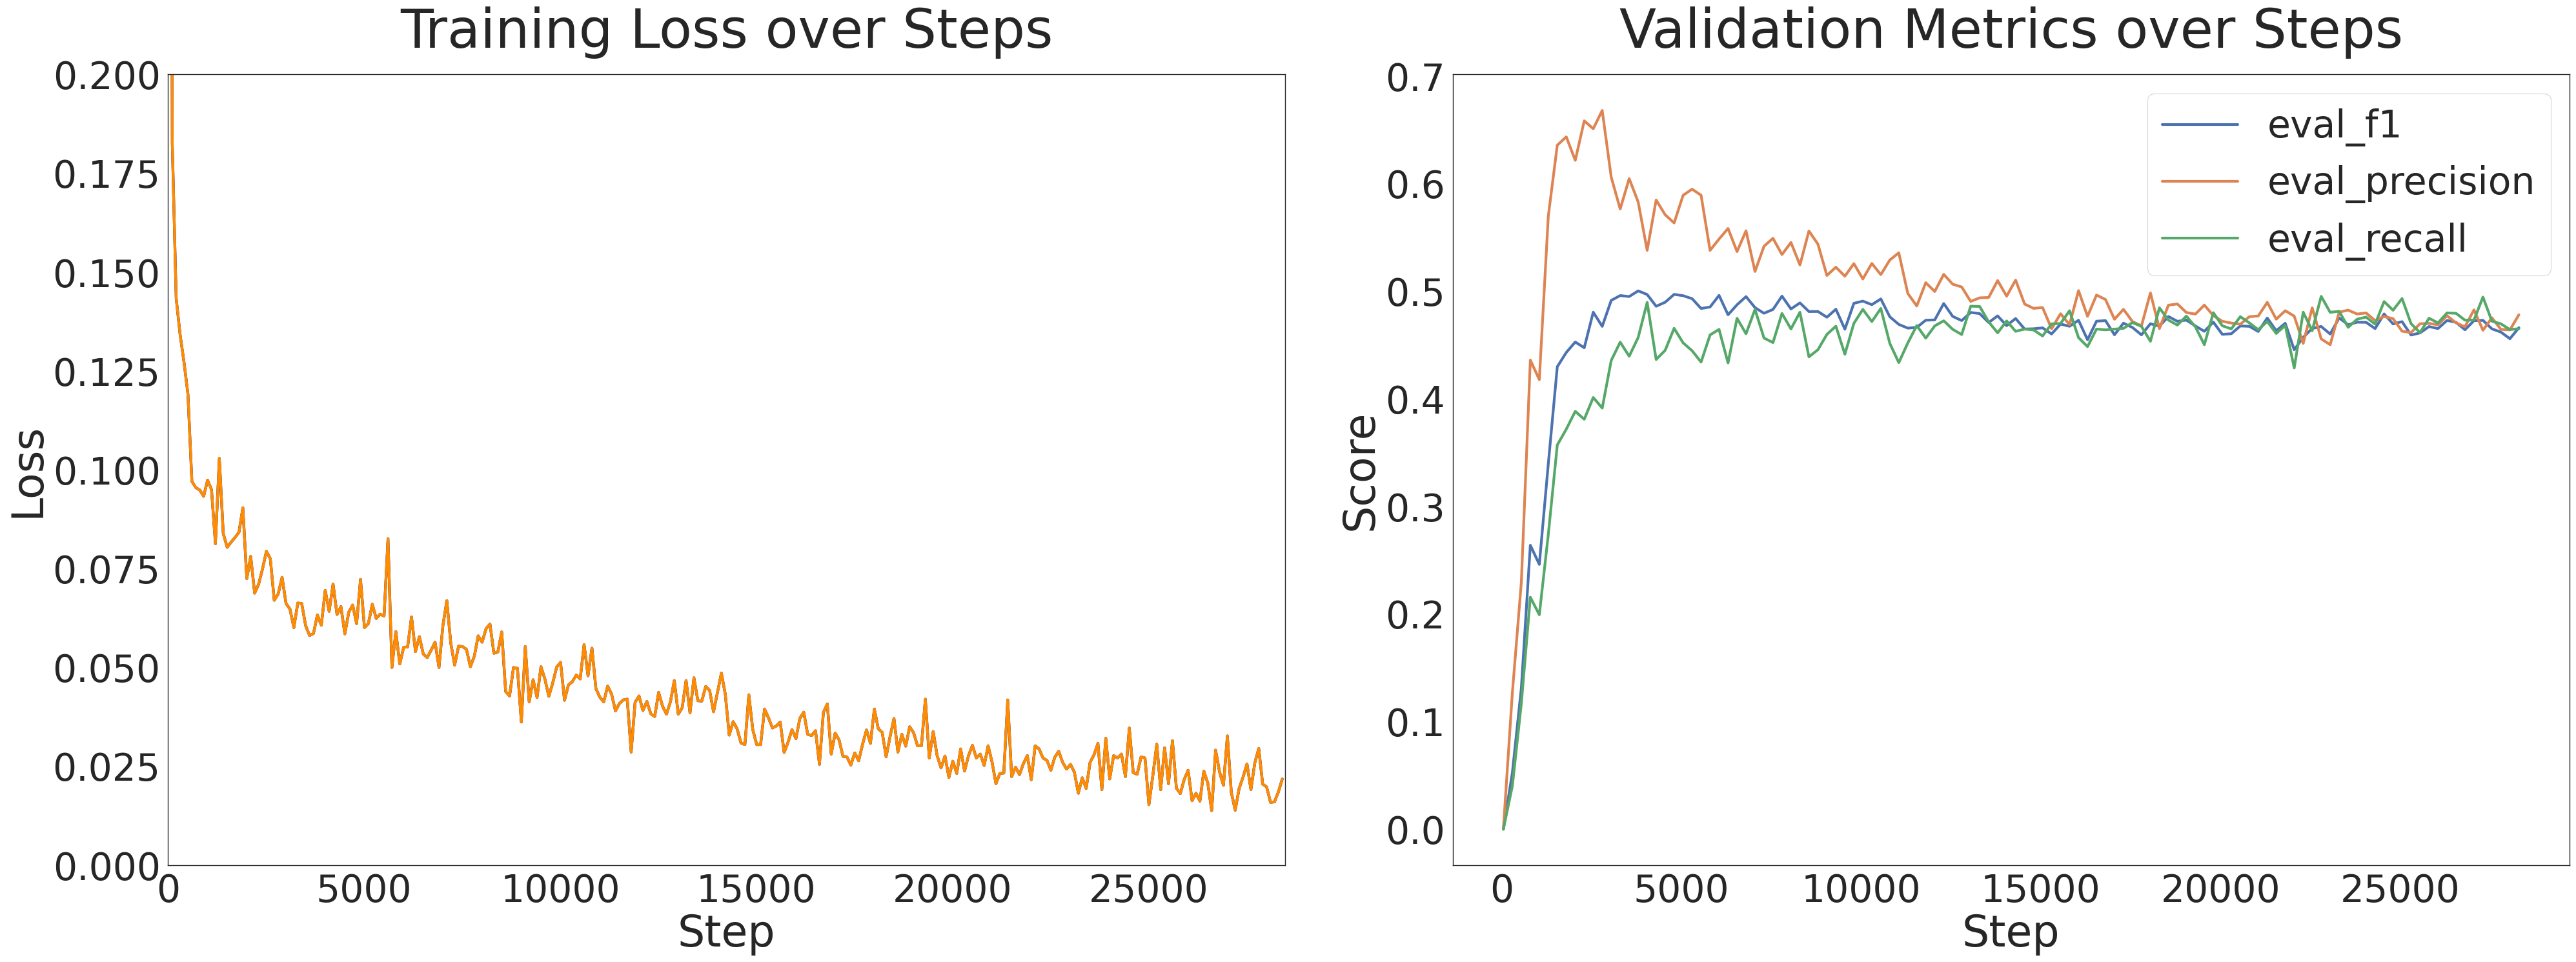

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

f = 3  # Font scaling factor
title_fontsize = 20 * f
label_fontsize = 16 * f
tick_fontsize = 14 * f
legend_fontsize = 14 * f

# Load training loss and validation metrics
loss_log_path = "goemotions_notransfer/loss_log.jsonl"
metrics_path = "goemotions_notransfer/metric_eval.jsonl"

loss_log = pd.read_json(loss_log_path, lines=True)
metrics = pd.read_json(metrics_path, lines=True)

# Sample data every N steps
sampled_loss_log = loss_log.iloc[::10]
sampled_metrics = metrics.iloc[::5]

# Set Seaborn style
sns.set(style="white", context="paper")  # White background without grid lines

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(40, 15))

# --- Plot Training Loss ---
sns.lineplot(
    x=sampled_loss_log["step"],
    y=sampled_loss_log["loss"],
    color="navy",
    errorbar=None,
    ax=ax[0],
    lw=3  # Line width
)
sns.lineplot(
    x=sampled_loss_log["step"],
    y=sampled_loss_log["loss"],
    color="darkorange",
    errorbar=None,
    estimator="mean",
    lw=3,  # Line width
    ax=ax[0]
)

# Apply to axis titles and labels
ax[0].set_title("Training Loss over Steps", fontsize=title_fontsize, pad=30)
ax[0].set_xlabel("Step", fontsize=label_fontsize)
ax[0].set_ylabel("Loss", fontsize=label_fontsize)
ax[0].tick_params(labelsize=tick_fontsize)
ax[0].set_xlim(0, max(loss_log["step"]))
ax[0].set_ylim(0, 0.2)

# --- Plot Sampled Validation Metrics ---
for metric in ["eval_f1", "eval_precision", "eval_recall"]:
    ax[1].plot(sampled_metrics["step"], sampled_metrics[metric], label=metric, lw=3)  # Line width

ax[1].legend()
ax[1].set_title("Validation Metrics over Steps", fontsize=title_fontsize, pad=30)
ax[1].set_xlabel("Step", fontsize=label_fontsize)
ax[1].set_ylabel("Score", fontsize=label_fontsize)
ax[1].tick_params(labelsize=tick_fontsize)
ax[1].legend(fontsize=legend_fontsize)

# Final layout adjustment
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)  # Increase to add space between the two plots
plt.show()